In [10]:
import quandl
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams
from scipy.stats import linregress

In [79]:
df = pd.read_excel("/Users/zuba818/Downloads/Stock_Data/stock-all.xls", sheet_name='stock')

In [12]:
df_stock_1 = df[df.stock_id == 1].copy()
df_stock_11 = df[df.stock_id == 11].copy()
df_stock_13 = df[df.stock_id == 13].copy()
df_stock_23 = df[df.stock_id == 23].copy()
df_stock_293 = df[df.stock_id == 293].copy()
df.head()

,stock_id,tdate,open,close,high,low,volume
0,1,2000-01-04,100.0,98.00,101.0,98.00,2283100
1,1,2000-01-05,93.5,91.25,95.0,90.75,4330100
2,1,2000-01-06,92.0,86.75,92.5,85.00,7462000
3,1,2000-01-07,88.0,88.50,89.0,86.50,4323800
4,1,2000-01-10,91.5,89.25,93.0,89.25,3713200


In [13]:
df.isnull().any()

stock_id    False
tdate       False
open        False
close       False
high        False
low         False
volume      False
dtype: bool

In [14]:
df.describe()

,stock_id,open,close,high,low,volume
count,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,1.106800e+04
mean,195.628117,46.638477,46.623703,47.052904,46.183871,2.094519e+07
std,308.090381,36.508613,36.492517,36.817295,36.174758,6.183043e+07
min,1.000000,1.110000,1.110000,1.160000,1.100000,0.000000e+00
25%,11.000000,13.587500,13.550000,13.650000,13.450000,2.379075e+06
50%,13.000000,44.000000,43.900000,44.400000,43.425000,4.636750e+06
75%,293.000000,80.750000,80.750000,81.500000,80.000000,9.231050e+06
max,857.000000,150.000000,150.000000,153.500000,149.000000,4.117606e+09


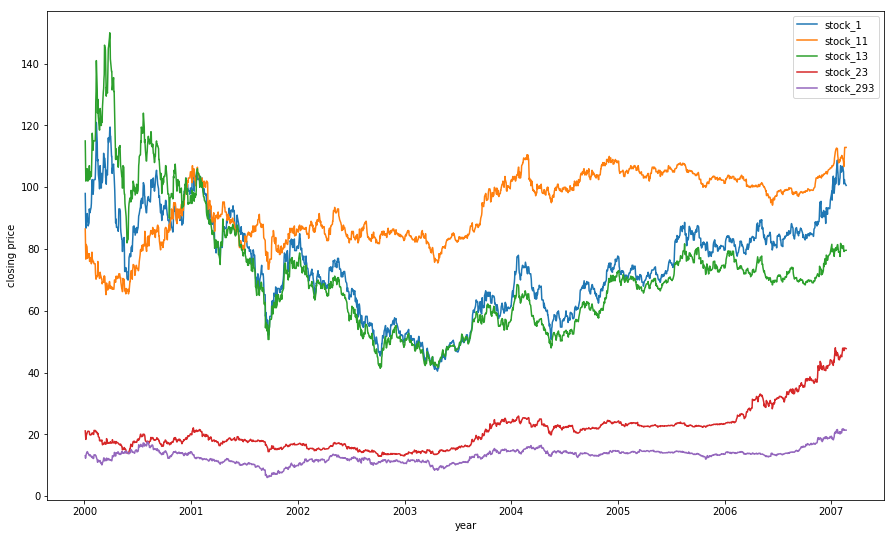

In [13]:
plt.plot(df_stock_1.tdate, df_stock_1.close,label = 'stock_1')
plt.plot(df_stock_11.tdate, df_stock_11.close,label = 'stock_11')
plt.plot(df_stock_13.tdate, df_stock_13.close,label = 'stock_13')
plt.plot(df_stock_23.tdate, df_stock_23.close,label = 'stock_23')
plt.plot(df_stock_293.tdate, df_stock_293.close,label = 'stock_293')
plt.xlabel("year")
plt.ylabel("closing price")
plt.legend(loc='upper right')

In [15]:
ndf = df[1:50]
ndf['dif'] = ndf.close - ndf.open

/Users/zuba818/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
ndf.tail()

,stock_id,tdate,open,close,high,low,volume,dif
45,1,2000-03-07,106.0,111.0,111.0,104.5,3446200,5.0
46,1,2000-03-08,105.0,109.5,113.0,105.0,3207000,4.5
47,1,2000-03-09,111.0,106.5,113.0,106.0,3533100,-4.5
48,1,2000-03-10,108.5,109.5,113.0,108.0,5477400,1.0
49,1,2000-03-13,110.0,106.5,113.5,106.0,5287600,-3.5


In [17]:
test = ndf[['dif']]
forecast_out = int(30)
test['Prediction'] = test[['dif']].shift(-forecast_out)
X = np.array(test.drop(['Prediction'],1))
X = preprocessing.scale(X)
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

/Users/zuba818/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
y = np.array(test['Prediction'])
y = y[:-forecast_out]

In [51]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)
# train
clf = LinearRegression()
clf.fit(X_train,y_train)
# test
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  -5.457505143553167


In [20]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[-0.18143449  1.82303882  0.58951678  0.28113627  0.28113627  1.82303882
  2.43979984  3.36494137  4.2900829  -4.34457137 -3.41942984  0.28113627
 -0.95238577 -0.95238577  1.2062778  -0.95238577  2.74818035  1.82303882
 -0.64400526 -2.64847857  1.82303882 -1.26076628 -0.64400526  0.89789729
  1.82303882  3.36494137  3.05656086 -2.49428831  0.89789729 -1.87752729]


Text(0,0.5,'price')

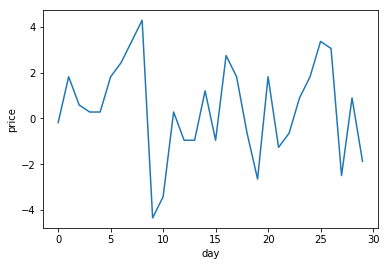

In [21]:
plt.plot(forecast_prediction)
plt.xlabel("day")
plt.ylabel("price")

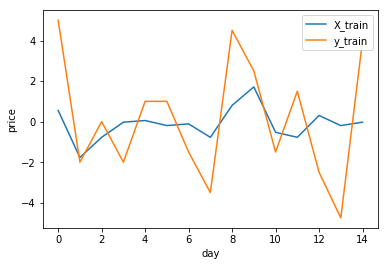

In [31]:
plt.plot(X_train, label= 'X_train')
plt.plot(y_train, label= 'y_train')
plt.xlabel("day")
plt.ylabel("price")
plt.legend(loc='upper right')

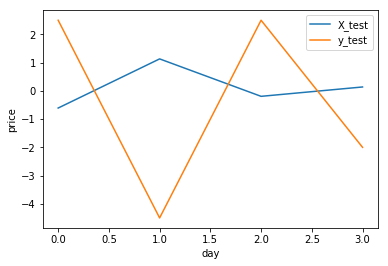

In [28]:
plt.plot(X_test, label= 'X_test')
plt.plot(y_test, label= 'y_test')
plt.xlabel("day")
plt.ylabel("price")
plt.legend(loc='upper right')

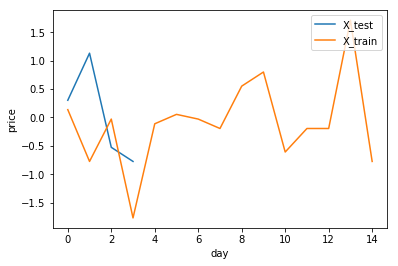

In [52]:
plt.plot(X_test, label= "X_test")
plt.plot(X_train, label= 'X_train')
plt.xlabel("day")
plt.ylabel("price")
plt.legend(loc='upper right')

In [75]:
import sklearn
from sklearn import cluster

In [97]:
s13 = df_stock_13.set_index('tdate')
s293 = df_stock_293.set_index('tdate')


s13['dif'] = s13.close - s13.open 
s293['dif'] = s293.close - s293.open 


In [108]:
stocks = pd.DataFrame({"stock_13": s13["dif"],
                        "stock_293": s293["dif"],
                      
})
stocks = stocks[1:101]
stocks.stock_13 = seco
stocks


,stock_13,stock_293
tdate,,
2000-01-05,-0.100,-0.65
2000-01-06,-0.700,0.55
2000-01-07,0.000,0.40
2000-01-10,-0.200,0.50
2000-01-11,-0.400,0.15
2000-01-12,0.150,0.20
2000-01-13,-0.250,0.00
2000-01-14,0.050,-0.10
2000-01-17,-0.300,-0.55


Text(0,0.5,'close293')

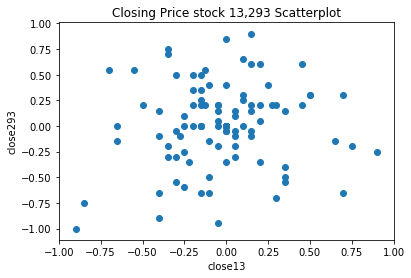

In [109]:
stocks.columns = ['stock_13','stock_293']
plt.scatter(stocks.stock_13, stocks.stock_293)
plt.title('Closing Price stock 13,293 Scatterplot')
plt.xlabel('close13')
plt.ylabel("close293")

In [110]:
stock = np.array(stocks)
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(stock)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

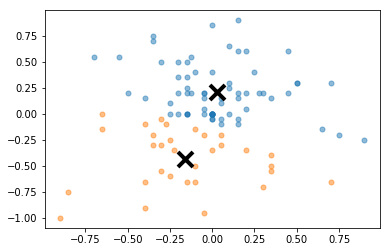

In [113]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = stock[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'.', markersize=10,alpha = 0.5)
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)

plt.show()